# Import

In [1]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral,denoise_nl_means,estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

In [2]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off')

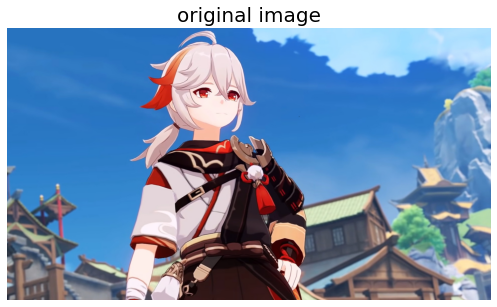

In [3]:
im_mes = Image.open("C:/Users/Ihsan/Pengolahan Citra Digital/Kazuha.jpg")
im_45 = im_mes.rotate(90) 
pylab.figure(figsize=(15,5))
plot_image(im_mes,'original image')

### Transformasi Rotasi

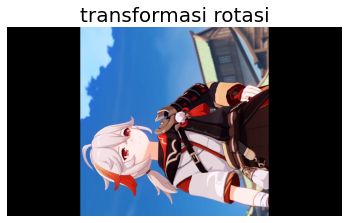

In [4]:
im_rot = im_mes.rotate(90)
plot_image(im_rot,'transformasi rotasi')

### Transformasi Affine

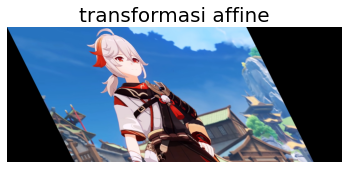

In [5]:
im_aff = im_mes.transform((int(1.4*im_mes.width), im_mes.height), Image.AFFINE,data=(1,-0.5,0,0,1,0))
plot_image(im_aff,'transformasi affine')

### Transformasi Perspektif

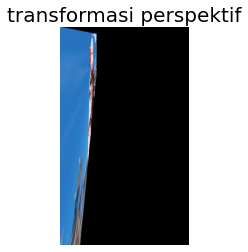

In [6]:
params = [1, 0.01, 0, -0.1, 0.5, 0.9, -0.006, -0.00001]
im_pers = im_mes.transform((im_mes.width//3, im_mes.height), Image.PERSPECTIVE, params,Image.BICUBIC)
plot_image(im_pers,'transformasi perspektif')

### Transformasi Pencerminan

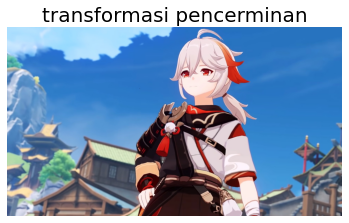

In [7]:
im_refl = im_mes.transpose(Image.FLIP_LEFT_RIGHT)
plot_image(im_refl,'transformasi pencerminan')

### RGB terpisah

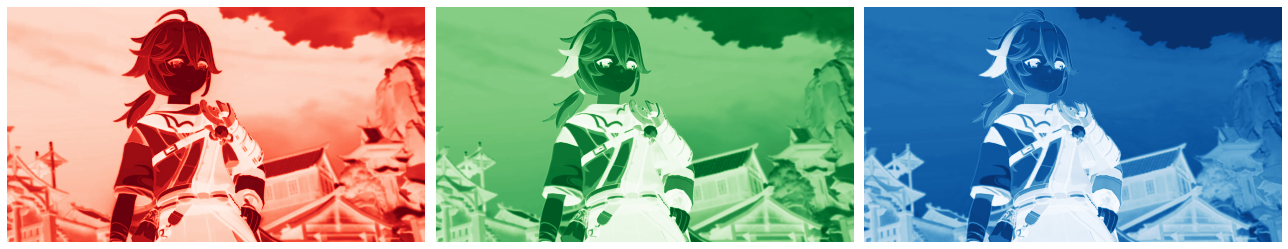

In [8]:
ch_r, ch_g, ch_b = im_mes.split() # split the RGB image into 3 channels: R, Gand B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channel

### Plot RGB

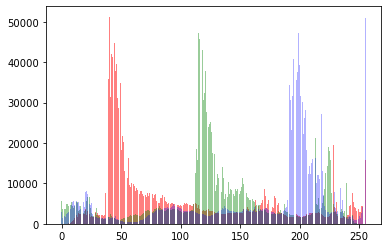

In [9]:
pl = im_mes.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()